In [8]:
import numpy as np
import dill
import pandas as pd
from scipy import optimize as opt
from sklearn.preprocessing import MinMaxScaler
import time
import sys
sys.path.append('../../')
import src

min_periods = 3 #Min window period for standard deviation
#Parameter limits that make sense for the product (Hand-picked this time)
optimization_limits = [(-4, 0.05), (-5, 4), (1.35, 0.2), (-1, 1)]


#Load policy and value function
#####################
file_n = "2019-4-12medium_prod_vfi_dict.dill"
with open('../../data/' + file_n, 'rb') as file:
    data_d = dill.load(file)

lambdas = src.generate_simplex_3dims(n_per_dim=data_d['n_of_lambdas_per_dim'])
price_grid = np.linspace(data_d['min_price'], data_d['max_price'])

policy = data_d['policy']
valueF = data_d['valueF']
lambdas_ext = src.generate_simplex_3dims(n_per_dim=
                                         data_d['n_of_lambdas_per_dim'])

#Interpolate policy (level price). valueF is already a function
policyF = src.interpolate_wguess(lambdas_ext, policy)


#dataframe and standard deviation
cleaned_data = "../../../firm_learning/data/cleaned_data/"

df = pd.read_csv(cleaned_data + "medium_prod_for_gmm.csv")
std_devs = (df.groupby('firm').level_prices.rolling(window=4, min=3)
            .std().reset_index()
            .rename(columns={'level_1': 't', 'level_prices': 'std_dev_prices'}))

df = pd.merge(df, std_devs, on=['firm', 't'], how='left')
df["dmd_shocks"] = np.random.normal(loc=0, scale=src.const.σ_ɛ, size=len(df))

mean_std_observed_prices = df.groupby('t').std_dev_prices.mean()[min_periods:]

#Mix Max scaling for xs
xs = df.groupby('firm').xs.first().values
scaler = MinMaxScaler()
xs = scaler.fit_transform(xs.reshape(-1, 1)).flatten()

Nfirms = len(xs)
# Just add zeroes. Makes sense for the gmm estimation
prior_shocks = src.gen_prior_shocks(Nfirms, σerror=0)

In [ ]:
import matplotlib
matplotlib.style.use('fivethirtyeight')
#Scatter plot of H, EB as function of x and prior_shocks

%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,0.98,'Results for σ_ɛ = 1.017')

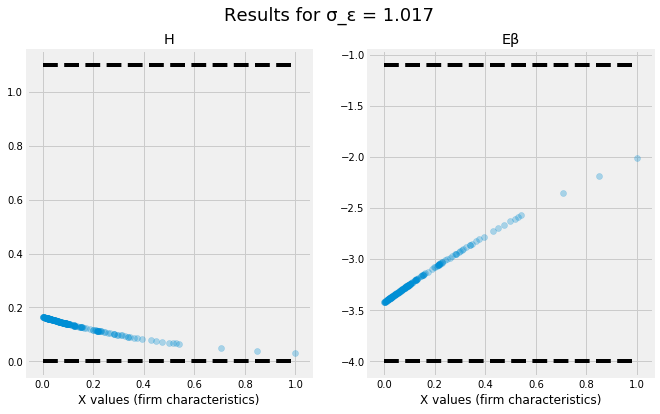

In [12]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 6), sharex=True)
 
#Obtained results
θ = np.array([-1.8,  -1.72,  1.23, -0.53])

ax1.set_xlabel("X values (firm characteristics)")
ax2.set_xlabel("X values (firm characteristics)")
H = np.e**((θ[0] + θ[1]*xs + prior_shocks))
Eβ = -np.e**(θ[2] + θ[3]*xs + prior_shocks)
ax1.scatter(xs, H, alpha=0.3)
ax1.set_title("H")
max_H_value = np.log(3)
ax1.hlines(0., xs.min(), xs.max(), linestyles="dashed")
ax1.hlines(max_H_value, xs.min(), xs.max(), linestyles="dashed")
ax2.scatter(xs, Eβ, alpha=0.3)
ax2.hlines(src.betas_transition.min(), xs.min(), xs.max(), linestyles="dashed")
ax2.hlines(src.betas_transition.max(), xs.min(), xs.max(), linestyles="dashed")
ax2.set_title("Eβ")
fig.suptitle("Results for σ_ɛ = 1.017", size=18)

Text(0.5,0.98,'Results for σ_ɛ = 1.5')

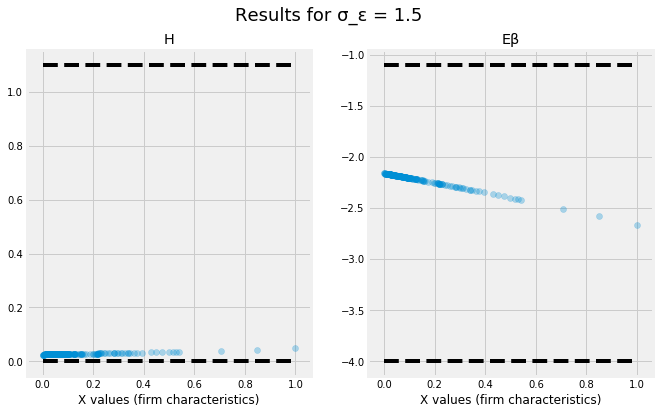

In [14]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 6), sharex=True)
 
#Obtained results
θ = np.array([-3.66,  0.63,  0.77,  0.21])

ax1.set_xlabel("X values (firm characteristics)")
ax2.set_xlabel("X values (firm characteristics)")
H = np.e**((θ[0] + θ[1]*xs + prior_shocks))
Eβ = -np.e**(θ[2] + θ[3]*xs + prior_shocks)
ax1.scatter(xs, H, alpha=0.3)
ax1.set_title("H")
max_H_value = np.log(3)
ax1.hlines(0., xs.min(), xs.max(), linestyles="dashed")
ax1.hlines(max_H_value, xs.min(), xs.max(), linestyles="dashed")
ax2.scatter(xs, Eβ, alpha=0.3)
ax2.hlines(src.betas_transition.min(), xs.min(), xs.max(), linestyles="dashed")
ax2.hlines(src.betas_transition.max(), xs.min(), xs.max(), linestyles="dashed")
ax2.set_title("Eβ")
fig.suptitle("Results for σ_ɛ = 1.5", size=18)